<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_DV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib assignment
# Written by Abiola Obembe
## Date: 2020-12-27
## Course: ML masters with deployment and deep learning

## qUESTION 1
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
# Write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Max= [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(12)


from scipy.optimize import curve_fit

def yearly_temps(x, a, b, c):
    return (a+ b * np.cos((x + c) * 2 * np.pi / x.max()))  # periodic function

res_max, cov_max = curve_fit(yearly_temps, months, Max, [40, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, months, Min, [20,10,0])

print(res_max)

[ 39.88861733 -10.59083164   1.33370157]


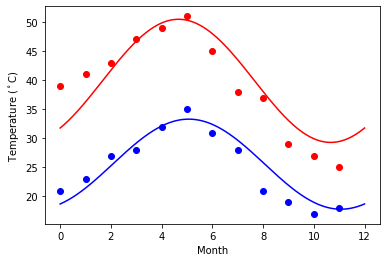

In [2]:
X = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(X, yearly_temps(X, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(X, yearly_temps(X, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Question 2

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [3]:
# Write your code here
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


male      843
female    466
Name: sex, dtype: int64


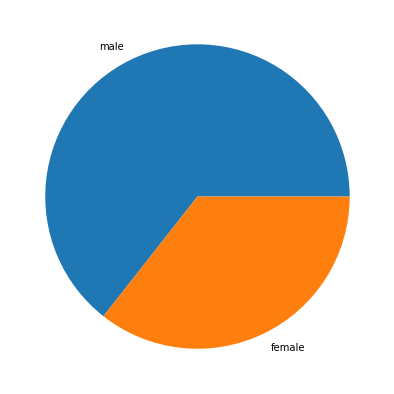

In [4]:
# Pie chart representing the male/female proprtion

d= titanic['sex'].value_counts()

print(d)
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(d, labels = ['male', 'female']) 
  
# show plot 
plt.show() 

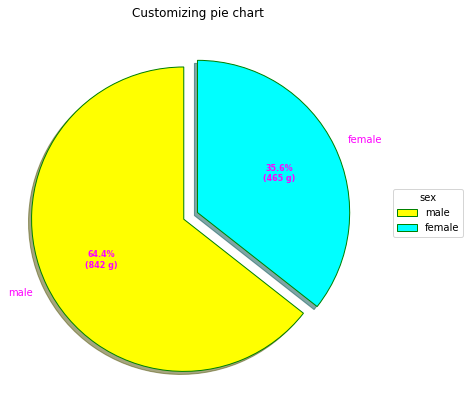

In [18]:
# Creating explode data 
explode = (0.1,0) 
# Creating color parameters 
colors = ( "yellow", "cyan", "brown", 
          "grey", "indigo", "beige") 
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
sex = ['male', 'female']
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(d,  
                                  autopct = lambda pct: func(pct, d), 
                                  explode = explode,  
                                  labels = sex, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  
# Adding legend 
ax.legend(wedges, sex, 
          title ="sex", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 

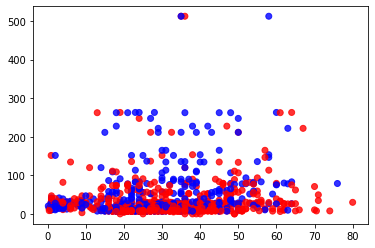

In [15]:
# scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic['sex'] = titanic['sex'].fillna(method = 'ffill')
import seaborn as sns
colors = {'male':'red', 'female':'blue'}


plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].map(colors), alpha= 0.8)
plt.show()


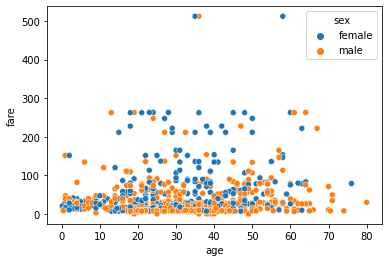

In [11]:
g =sns.scatterplot(x="age", y="fare",hue="sex", data=titanic);